### 6.4. EDA 4: Visualizing Musical Evolution Patterns

To make our musical evolution metrics more intuitive, we explored how artists differ in two main dimensions:
- **Systematic Evolution**: How much an artist changes across time
- **Artistic Variety**: How diverse their style is *within* each period

#### Artist Evolution Case Studies
Before jumping into full datasets, let’s visualize a few examples to ground our understanding:

High Evolution Example: Arca


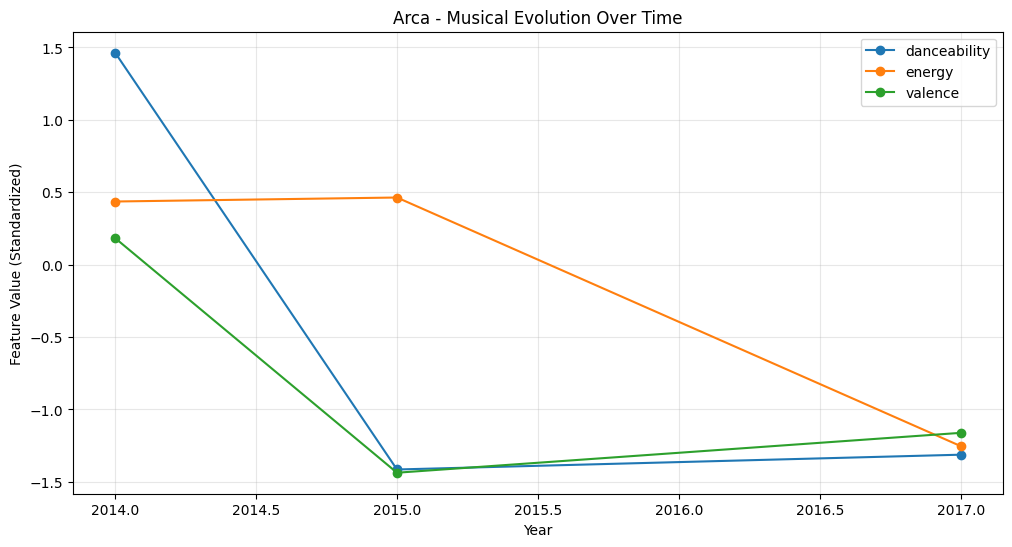


Low Evolution Example: The Highwaymen


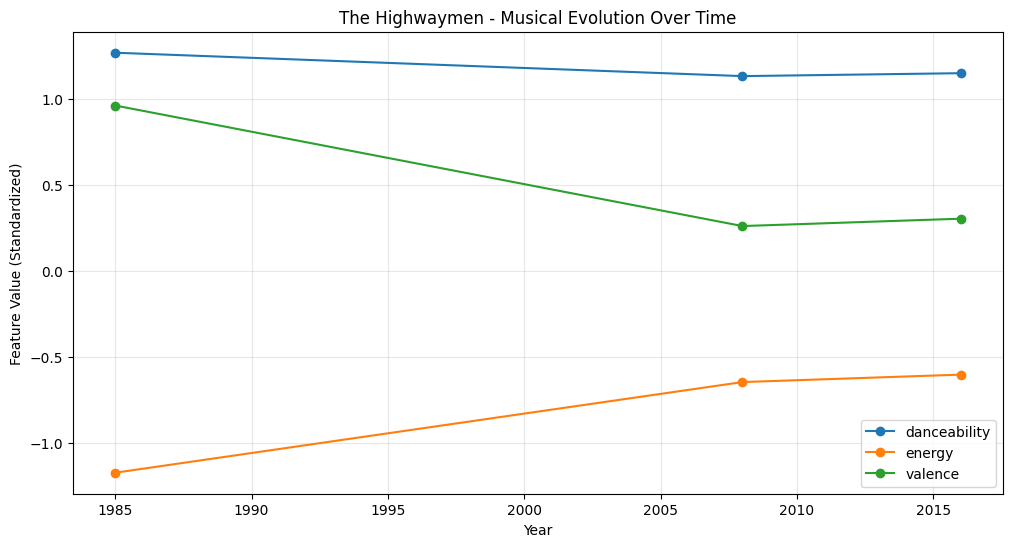

,danceability,energy,valence
year,,,
1985,1.270219,-1.175401,0.962881
2008,1.134000,-0.647502,0.260890
2016,1.151027,-0.604167,0.303789


In [ ]:
# Function to plot an artist's evolution over time
def plot_artist_evolution(artist_name, features=['danceability', 'energy', 'valence']):
    artist_data = df_final[df_final['artist'] == artist_name].sort_values('year')
    
    # Calculate yearly averages
    yearly_avg = artist_data.groupby('year')[features].mean()
    
    # Plot evolution
    plt.figure(figsize=(12, 6))
    for feature in features:
        plt.plot(yearly_avg.index, yearly_avg[feature], marker='o', label=feature)
    
    plt.title(f'{artist_name} - Musical Evolution Over Time')
    plt.xlabel('Year')
    plt.ylabel('Feature Value (Standardized)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return yearly_avg

high_evolver = analysis_df.nlargest(1, 'musical_change_score').iloc[0]['artist']
low_evolver = analysis_df.nsmallest(1, 'musical_change_score').iloc[0]['artist']

print(f"High Evolution Example: {high_evolver}")
plot_artist_evolution(high_evolver)

print(f"\nLow Evolution Example: {low_evolver}")
plot_artist_evolution(low_evolver)

### Scatter Plot: Systematic Change vs Variety

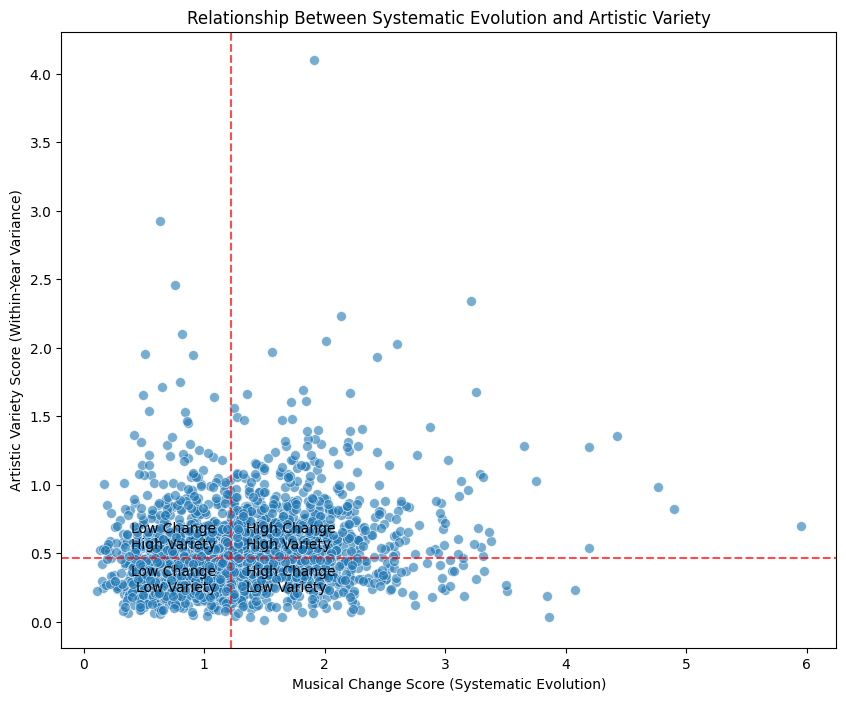

In [ ]:
# Scatter plot of evolution metrics
plt.figure(figsize=(10, 8))
sns.scatterplot(data=analysis_df, x='musical_change_score', y='artistic_variety_score', 
                alpha=0.6, s=50)
plt.title('Relationship Between Systematic Evolution and Artistic Variety')
plt.xlabel('Musical Change Score (Systematic Evolution)')
plt.ylabel('Artistic Variety Score (Within-Year Variance)')

# Add quadrant lines
change_median = analysis_df['musical_change_score'].median()
variety_median = analysis_df['artistic_variety_score'].median()
plt.axvline(change_median, color='red', linestyle='--', alpha=0.7)
plt.axhline(variety_median, color='red', linestyle='--', alpha=0.7)

# Add quadrant labels
plt.text(change_median*1.1, variety_median*1.1, 'High Change\nHigh Variety', 
         fontsize=10, ha='left', va='bottom')
plt.text(change_median*0.9, variety_median*1.1, 'Low Change\nHigh Variety', 
         fontsize=10, ha='right', va='bottom')
plt.text(change_median*1.1, variety_median*0.9, 'High Change\nLow Variety', 
         fontsize=10, ha='left', va='top')
plt.text(change_median*0.9, variety_median*0.9, 'Low Change\nLow Variety', 
         fontsize=10, ha='right', va='top')

plt.show()

### 6.5 Do Artists Who Switch Genres Evolve More?


TODO: something something wow yipee why did it do that its because xyz


=== ROCK GENRE ANALYSIS ===
Number of artists: 308
Mean change score: 1.232
Mean variety score: 0.549

Top 5 rock artists by evolution score:
             artist  musical_change_score  artistic_variety_score
  Christina Stürmer              3.844232                0.186866
          Ty Segall              3.653280                1.285334
             Wavves              3.313535                0.477445
Buffalo Springfield              2.916299                0.533402
  Tides From Nebula              2.644729                0.213559


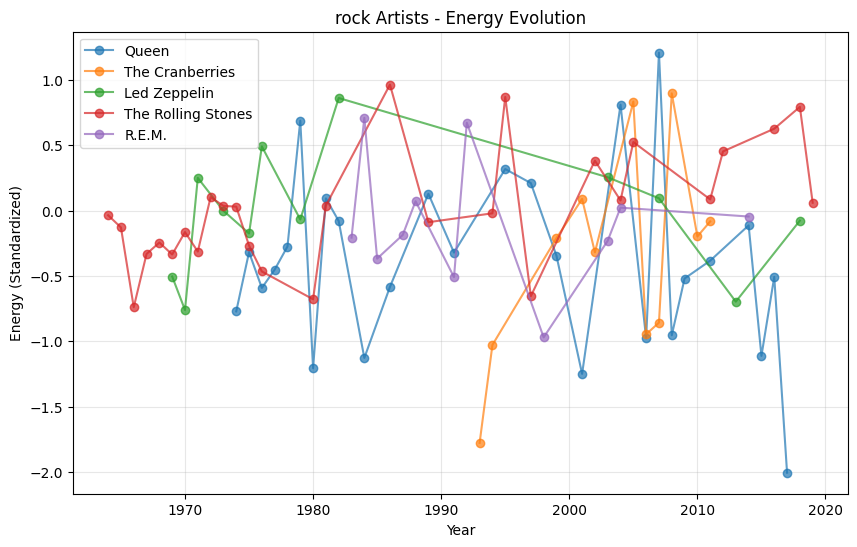


=== POP GENRE ANALYSIS ===
Number of artists: 172
Mean change score: 1.278
Mean variety score: 0.467

Top 5 pop artists by evolution score:
             artist  musical_change_score  artistic_variety_score
             Fergie              3.268605                0.683765
     Matt Nathanson              3.052447                0.366050
Bombay Bicycle Club              2.995456                0.230621
            Tove Lo              2.968960                0.321809
      Justin Bieber              2.533585                0.388470


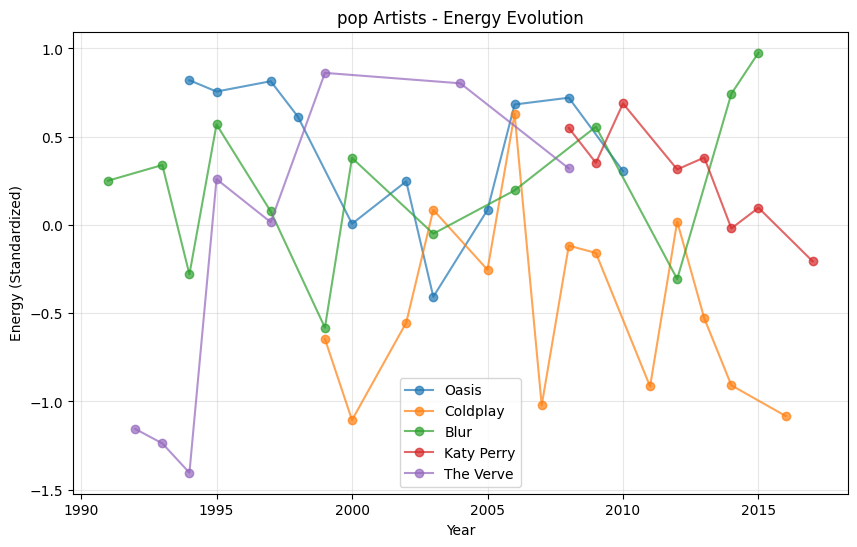


=== ELECTRONIC GENRE ANALYSIS ===
Number of artists: 163
Mean change score: 1.404
Mean variety score: 0.622

Top 5 electronic artists by evolution score:
       artist  musical_change_score  artistic_variety_score
   Black Dice              4.766759                0.982458
   Gold Panda              3.211017                2.343248
Birdy Nam Nam              3.039034                0.449697
Mouse on Mars              2.927006                0.883425
Little Dragon              2.636480                0.855826


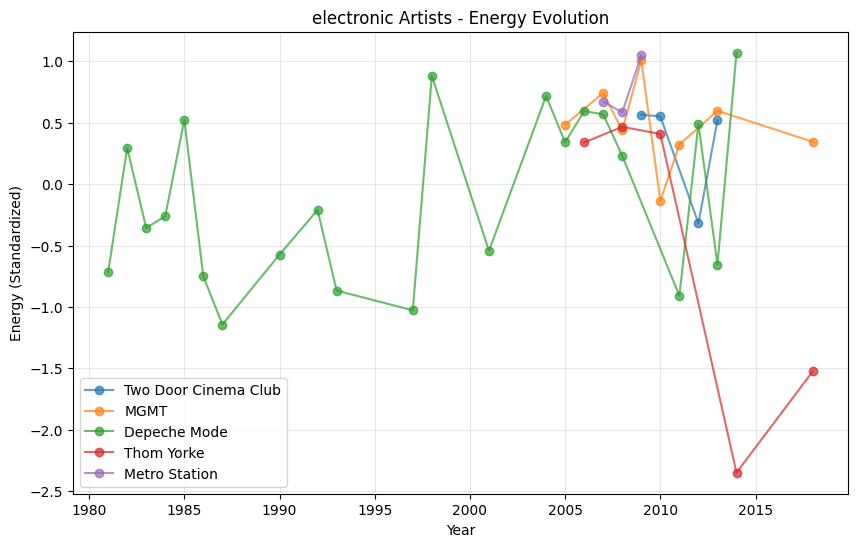


=== GENRE COMPARISON ===
              musical_change_score               artistic_variety_score       
                             count   mean    std                   mean    std
primary_genre                                                                 
alternative                    128  1.280  0.605                  0.506  0.230
ambient                         76  1.387  0.761                  0.671  0.388
blues                           53  1.466  0.702                  0.699  0.620
classical                       49  1.412  0.787                  0.514  0.288
country                         82  1.146  0.624                  0.387  0.252
dance                           77  1.273  0.581                  0.426  0.265
dark_ambient                    13  1.319  0.804                  0.595  0.252
drum_and_bass                   28  1.193  0.498                  0.538  0.214
electro                         24  1.653  0.816                  0.538  0.267
electronic                

In [ ]:
# Compare evolution patterns within specific genres
def analyze_genre_evolution(genre_name):
    genre_artists = analysis_df[analysis_df['primary_genre'] == genre_name]
    
    print(f"\n=== {genre_name.upper()} GENRE ANALYSIS ===")
    print(f"Number of artists: {len(genre_artists)}")
    print(f"Mean change score: {genre_artists['musical_change_score'].mean():.3f}")
    print(f"Mean variety score: {genre_artists['artistic_variety_score'].mean():.3f}")
    
    if len(genre_artists) < 3:
        return f"Not enough artists in {genre_name}"
    
    # Show top 5 artists in this genre
    print(f"\nTop 5 {genre_name} artists by evolution score:")
    top_genre_artists = genre_artists.nlargest(5, 'musical_change_score')
    print(top_genre_artists[['artist', 'musical_change_score', 'artistic_variety_score']].to_string(index=False))
    
    plt.figure(figsize=(10, 6))
    
    # Plot individual artist trajectories
    for _, artist_row in genre_artists.head(5).iterrows():
        artist_name = artist_row['artist']
        artist_data = df_final[df_final['artist'] == artist_name].sort_values('year')
        
        if len(artist_data) >= 3:
            yearly_energy = artist_data.groupby('year')['energy'].mean()
            plt.plot(yearly_energy.index, yearly_energy.values, 
                    marker='o', alpha=0.7, label=artist_name)
    
    plt.title(f'{genre_name} Artists - Energy Evolution')
    plt.xlabel('Year')
    plt.ylabel('Energy (Standardized)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return genre_artists

# Analyze a few key genres
rock_analysis = analyze_genre_evolution('rock')
pop_analysis = analyze_genre_evolution('pop')
electronic_analysis = analyze_genre_evolution('electronic')

# Compare genres
print("\n=== GENRE COMPARISON ===")
genre_comparison = analysis_df.groupby('primary_genre').agg({
    'musical_change_score': ['count', 'mean', 'std'],
    'artistic_variety_score': ['mean', 'std']
}).round(3)

print(genre_comparison.head(10).to_string())

=== GENRE CHANGE ANALYSIS ===
Artists who changed genres: 1705
Artists who stayed in one genre: 972

=== EVOLUTION SCORES COMPARISON ===
Genre changers - Count: 1657, Mean: 1.354, Std: 0.633
Genre stayers - Count: 951, Mean: 1.232, Std: 0.667

=== EXAMPLES OF GENRE CHANGERS ===
          artist primary_genre  musical_change_score
            Arca       ambient              5.953018
Rachael Yamagata         indie              4.901274
      Black Dice    electronic              4.766759
 Venetian Snares           idm              4.422502
   Emilie Autumn        gothic              4.192717
           Qntal        gothic              4.075538
           alt-J         indie              3.754283
       Ty Segall          rock              3.653280
     Angie Stone           rnb              3.494020
  Lady Sovereign       hip-hop              3.377908

=== DETAILED GENRE CHANGES ===

Arca:
year
2014    ambient
2015    Unknown
2017    ambient

Rachael Yamagata:
year
2003    indie
2004    

C:\Users\goaar\AppData\Local\Temp\ipykernel_12124\3056386583.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([changers_evolution, stayers_evolution],


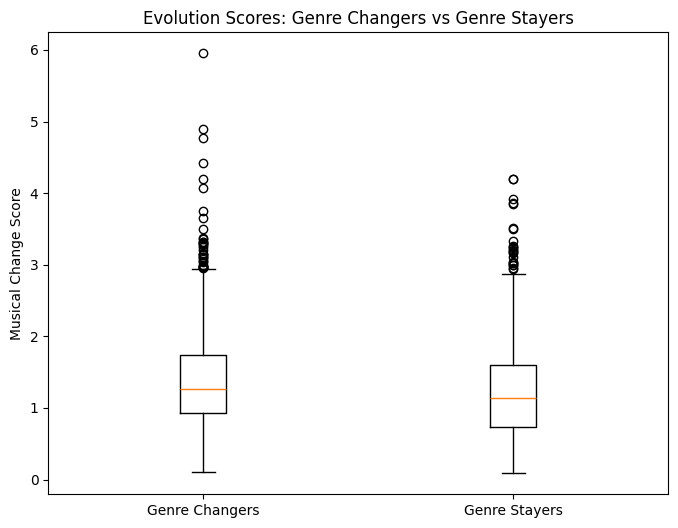


=== STATISTICAL TEST ===
T-test statistic: 4.6282
P-value: 0.0000
Significant difference: Yes


In [ ]:
# Do artists who change genres evolve more?
artist_genre_changes = df_final.groupby('artist')['yearly_genre'].nunique()
genre_changers = artist_genre_changes[artist_genre_changes > 1].index
genre_stayers = artist_genre_changes[artist_genre_changes == 1].index

print("=== GENRE CHANGE ANALYSIS ===")
print(f"Artists who changed genres: {len(genre_changers)}")
print(f"Artists who stayed in one genre: {len(genre_stayers)}")

# Compare evolution scores
changers_evolution = analysis_df[analysis_df['artist'].isin(genre_changers)]['musical_change_score']
stayers_evolution = analysis_df[analysis_df['artist'].isin(genre_stayers)]['musical_change_score']

print(f"\n=== EVOLUTION SCORES COMPARISON ===")
print(f"Genre changers - Count: {len(changers_evolution)}, Mean: {changers_evolution.mean():.3f}, Std: {changers_evolution.std():.3f}")
print(f"Genre stayers - Count: {len(stayers_evolution)}, Mean: {stayers_evolution.mean():.3f}, Std: {stayers_evolution.std():.3f}")

# Show some examples of genre changers
print(f"\n=== EXAMPLES OF GENRE CHANGERS ===")
genre_changer_artists = analysis_df[analysis_df['artist'].isin(genre_changers)].nlargest(10, 'musical_change_score')
print(genre_changer_artists[['artist', 'primary_genre', 'musical_change_score']].to_string(index=False))

# Show genre change details for top changers
print(f"\n=== DETAILED GENRE CHANGES ===")
for _, artist_row in genre_changer_artists.head(3).iterrows():
    artist_name = artist_row['artist']
    artist_genres = df_final[df_final['artist'] == artist_name].groupby('year')['yearly_genre'].first()
    print(f"\n{artist_name}:")
    print(artist_genres.to_string())

plt.figure(figsize=(8, 6))
plt.boxplot([changers_evolution, stayers_evolution], 
           labels=['Genre Changers', 'Genre Stayers'])
plt.title('Evolution Scores: Genre Changers vs Genre Stayers')
plt.ylabel('Musical Change Score')
plt.show()

# Statistical test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(changers_evolution, stayers_evolution)
print(f"\n=== STATISTICAL TEST ===")
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Significant difference: {'Yes' if p_val < 0.05 else 'No'}")